# Neural Network - Iris
Use Neural Network to identify which type of flower it belongs according to the features

## Pretrain procedure

### Import data

In [1]:
import pandas as pd
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)


In [2]:
df
# my_df.head()  to shaow the first five data
# my_df.tail()  to show the last five data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Prepare data

In [3]:
# Change variety from String to integers
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Versicolor', 1)
df['variety'] = df['variety'].replace('Virginica', 2)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# Set X, y
X = df.drop('variety', axis=1)
y = df['variety']

In [5]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64

In [7]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Splitting data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
# 20% used for testing, 80% used for training

In [11]:
import torch
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.9000, 2.5000, 4.5000, 1

In [13]:
y_train

tensor([1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2,
        1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0,
        0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2,
        0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1,
        2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0])

### Prepare the machine learning model

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower)
    # --> Hidden layer 1 (number of neurons)
    # --> H2 (n2)
    # --> output (3 classes of iris flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()  # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [15]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

### Define the loss function

In [16]:
loss_fn = nn.CrossEntropyLoss()
# Choose Optimizer (here we choose Adam), lr (if error doesn't go down after a bunch of epochs, lower this)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Trainng the mahcine learning model

In [17]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 150
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)

    # Measure loss, gonna be high at first
    loss = loss_fn(y_pred, y_train)

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # Print the loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    # Do backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950954437256
Epoch: 40 and loss: 0.43861743807792664
Epoch: 50 and loss: 0.2904532551765442
Epoch: 60 and loss: 0.1778070479631424
Epoch: 70 and loss: 0.11584126949310303
Epoch: 80 and loss: 0.08936373144388199
Epoch: 90 and loss: 0.07752914726734161
Epoch: 100 and loss: 0.07132724672555923
Epoch: 110 and loss: 0.06751007586717606
Epoch: 120 and loss: 0.06487806886434555
Epoch: 130 and loss: 0.06290555745363235
Epoch: 140 and loss: 0.061341769993305206


### Graph lost for the training period

Text(0.5, 0, 'Epoch')

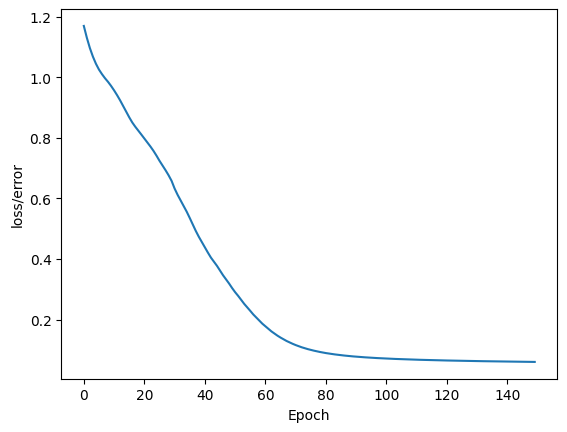

In [18]:
# Graph it out!
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

## Evaluation of machine learning model

In [19]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():       # Basically turn off back propagation
    y_eval = model.forward(X_test)  # X_test are features from our test set, y_eval will be predictions
    loss = loss_fn(y_eval, y_test)  # Find the loss

In [20]:
loss

tensor(0.0369)

In [21]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}.) {str(y_val)} \t Pred: {y_val.argmax().item()} \t Actual: {y_test[i]}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct}/{i+1} correct!")

1.) tensor([-4.0769,  5.0184,  0.4863]) 	 Pred: 1 	 Actual: 1
2.) tensor([  8.9815,   1.7349, -13.3731]) 	 Pred: 0 	 Actual: 0
3.) tensor([  8.0115,   2.0088, -12.3494]) 	 Pred: 0 	 Actual: 0
4.) tensor([-4.1934,  5.3403,  0.3238]) 	 Pred: 1 	 Actual: 1
5.) tensor([-8.8458,  3.4787,  6.3050]) 	 Pred: 2 	 Actual: 2
6.) tensor([-9.1817,  4.6736,  5.7083]) 	 Pred: 2 	 Actual: 2
7.) tensor([  7.5344,   2.1834, -11.8796]) 	 Pred: 0 	 Actual: 0
8.) tensor([  8.1321,   1.9149, -12.4231]) 	 Pred: 0 	 Actual: 0
9.) tensor([-3.4921,  5.3731, -0.4162]) 	 Pred: 1 	 Actual: 1
10.) tensor([  8.6955,   1.8713, -13.1212]) 	 Pred: 0 	 Actual: 0
11.) tensor([-4.4471,  5.7066,  0.4118]) 	 Pred: 1 	 Actual: 1
12.) tensor([-10.6026,   2.3204,   8.7001]) 	 Pred: 2 	 Actual: 2
13.) tensor([-2.1714,  4.8601, -1.2609]) 	 Pred: 1 	 Actual: 1
14.) tensor([-1.2395,  5.5190, -2.7739]) 	 Pred: 1 	 Actual: 1
15.) tensor([-9.0502,  3.2181,  6.5973]) 	 Pred: 2 	 Actual: 2
16.) tensor([-10.3256,   1.8863,   8.7130]) 	 

## Predictions

### Prediction on a new example

In [22]:
# Creating a new iris and determine which class it belongs to
new_iris= torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
    print(model(new_iris))

tensor([  8.4136,   1.6887, -12.5883])


### Prediction on a second new example

In [24]:
# Another example
another_iris = torch.tensor([5.9, 3. , 5.1, 1.8])
with torch.no_grad():
    result = model(another_iris)
    classified = result.argmax().item()
    print(f'{result} \t {classified}')

tensor([-8.2475,  3.2212,  5.7974]) 	 2


## Saving and loading machine learning model

In [25]:
# Save our NN Model
torch.save(model.state_dict(), 'Neural_Network-Iris.pt' )

In [26]:
# Load the Saved Model
loaded_model_from_local_machine = Model()
loaded_model_from_local_machine.load_state_dict(torch.load('Neural_Network-Iris.pt'))

<All keys matched successfully>

In [27]:
# Make sure our model is loaded correctly
loaded_model_from_local_machine.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)